## **Ensemble Methods**

In simple terms, **Ensemble Methods** are the machine learning equivalent of "The Wisdom of Crowds."

Instead of relying on a single model (like one Decision Tree) to make a prediction, you build a **team** of models and combine their outputs. The core philosophy is that a group of "weak learners" (models that are just okay) can combine to form a single "strong learner" (a model that is highly accurate).

### Why do they work?

Single models often suffer from one of two problems:

1. **High Variance (Overfitting):** They memorize the training data too closely (e.g., a complex Decision Tree).
2. **High Bias (Underfitting):** They are too simple to capture the patterns (e.g., a shallow Tree or Linear Regression).

Ensembles solve this by averaging out the errors.

### The Two Main Families

#### **1. Bagging (Bootstrap Aggregating)**

* **Philosophy:** "Independence & Democracy."
* **How it works:** You train many models **in parallel** (at the same time). Each model looks at a random subset of the data. When it's time to predict, they vote.
* **Goal:** Reduce **Variance** (Overfitting).
* **Star Player:** **Random Forest**.
* **Analogy:** You ask 100 different doctors for a diagnosis. Some might be wrong, but the *average* diagnosis is likely correct because their individual errors cancel out.

#### **2. Boosting**

* **Philosophy:** "Sequential Correction."
* **How it works:** You train models **sequentially** (one after another). Model 2 focuses specifically on the examples that Model 1 got wrong. Model 3 fixes the errors of Model 2, and so on.
* **Goal:** Reduce **Bias** (Underfitting).
* **Star Players:** **XGBoost, LightGBM, AdaBoost**.
* **Analogy:** You take a test. You pass the questions you got wrong to a tutor, who teaches you *only* those hard topics. You retake the test. You pass the remaining wrong ones to a specialist. By the end, you have covered all the hard cases.


---

### Topic Breakdown

```
L3: Ensemble Methods
├── Concept 1: Advanced Data Prep (The Foundation)
│   ├── Missing Value Imputation (Handling NaNs)
│   ├── Categorical Encoding (One-Hot vs. Label)
│   ├── Feature Scaling (StandardScaler - Crucial for Linear Regression)
│   ├── Train-Test Split (Preventing Data Leakage)
│   └── Task: Build a reusable preprocessing class/function
│
├── Concept 2: The Baseline & The Yardstick
│   ├── Linear Regression (Refresher)
│   ├── Evaluation Metrics (RMSE vs MAE)
│   ├── Purpose: Establishing the "dumb" model performance
│   └── Task: Train Baseline and calculate error metrics
│
├── Concept 3: Bagging (Random Forest)
│   ├── Bootstrapping (Sampling with replacement)
│   ├── Aggregation (Parallel voting)
│   ├── Variance Reduction (Combating Overfitting)
│   └── Task: Implement Random Forest & compare to Baseline
│
├── Concept 4: Boosting (XGBoost)
│   ├── Sequential Correction (Residual Learning)
│   ├── Gradient Boosting Mechanics
│   ├── Bias Reduction (Combating Underfitting)
│   └── Task: Implement XGBoost & compare to RF
│
├── Concept 5: Interpretation (Opening the Black Box)
│   ├── Feature Importance (Gain/Split)
│   ├── SHAP Values (Global vs Local explanation)
│   └── Task: Generate SHAP summary plots
│
└── Mini-Project: House Price Prediction Showdown
    └── Full pipeline comparison: LR vs. RF vs. XGBoost

```

## **Concept 1: Advanced Data Prep (The Foundation)**

### Intuition

Before we can use ensemble methods, we must ensure the data is in a format the models can digest. A Random Forest can handle raw data better than a Linear Regression, but for a fair comparison (and to make Linear Regression work at all), we need rigorous preprocessing.

Two critical challenges:

1. **Heterogeneity:** Real data is a mix of numbers (prices, area) and concepts (neighborhood, zoning). Machines only speak math.
2. **Incompleteness:** Real data has holes (NaNs). Most algorithms will crash if fed a NaN.

### Mechanics & The "Golden Rule"

To fix this, we need specific tools for specific data types.

1. **Imputation (Filling Gaps):**
* **Numerical:** Use `Mean` or `Median`. Median is usually safer for prices (robust to outliers like mansions).
* **Categorical:** Use `Mode` (most frequent) or a constant value like "Missing".


2. **Encoding (Text to Numbers):**
* **One-Hot Encoding:** Creates binary columns (`Zone_A`, `Zone_B`). Essential for Linear Regression to avoid implying an order (A < B) where none exists.


3. **Scaling:**
* **StandardScaler:** Transforms data to mean 0, variance 1. Critical for Linear Regression (so "Area=2000" doesn't dominate "Bedrooms=3"). Trees don't strictly care, but it doesn't hurt.


**The Golden Rule of Preprocessing (Data Leakage):**
You must **split your data BEFORE you process it**.

* **Fit** your Imputers/Scalers on the **Training Set** only.
* **Transform** the **Test Set** using the statistics from the Training Set.
* *Why?* If you impute using the mean of the *entire* dataset, you have "leaked" information from the future (the test set) into your training.

---

The logic for almost all Scikit-Learn tools is the same:

1. **Import & Initialize:** Create the object.
2. **Fit:** Learn the stats (mean, mode, etc.) from the **Training** data.
3. **Transform:** Apply those stats to modify the data.

#### 1. StandardScaler

**What is it?**
It is a tool that forces your data to look like a standard Bell Curve. It shifts the center of your data to **0** and scales the spread (variance) to **1**.

**Why use it?**
Imagine you are predicting house prices using two features:

* `Number of Rooms`: Range 1 to 10.
* `Square Footage`: Range 500 to 5,000.

If you don't scale, the model sees the number "5,000" and thinks it is massive compared to "10". It might wrongly assume Square Footage is 500 times more important than Rooms just because the number is bigger. Linear Regression and Gradient Descent struggle to find the right answer when scales are this different.

**How it works (The Math):**
For every single value (x), it subtracts the average (\mu) and divides by the standard deviation (\sigma).


**Visual Example:**
| Feature | Raw Data | Scaled Data (Approx) |
| :--- | :--- | :--- |
| **Salary** | 100,000 | 1.2 |
| **Salary** | 50,000 | -0.5 |
| **Age** | 60 | 1.2 |
| **Age** | 30 | -0.5 |

*Notice how Salary and Age are now in the same "language" (range).*

```python
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. Initialize
# "strategy" can be 'mean', 'median', 'most_frequent', or 'constant'
imputer = SimpleImputer(strategy='median') 
scaler = StandardScaler()

# 2. Fit (Learn from Train) & 3. Transform (Apply to Train)
# Common shortcut: fit_transform() does both at once
X_train_clean = imputer.fit_transform(X_train_numerical)

# CRITICAL: For Test data, ONLY transform. Do not fit!
X_test_clean = imputer.transform(X_test_numerical)

```

`SimpleImputer` strategies are case-sensitive.
* `"Mean"` \rightarrow `"mean"`
* `"Median"` \rightarrow `"median"`
* `"Mode"` \rightarrow **`"most_frequent"`** (There is no "mode" strategy in sklearn).

---

### 2. OneHotEncoder

**What is it?**
It converts a categorical column (text) into multiple binary columns (0s and 1s).

**Why use it?**
Computers can't multiply "Red" by "Blue". We must convert text to numbers.

* **Bad Approach (Label Encoding):** Assigning Red=1, Blue=2, Green=3.
* *Problem:* The model thinks Green is "greater than" Red (3 > 1). It might try to average Red and Green to get Blue. This is false logic for colors or cities.


* **Good Approach (One-Hot):** Create a separate flag for each color. "Is it Red? Yes/No", "Is it Blue? Yes/No".

**How it works:**
It creates a new column for every unique value in the category.

**Visual Example:**
**Input:**
| City |
| :--- |
| NY |
| LA |

**Output:**
| City_NY | City_LA |
| :--- | :--- |
| 1 | 0 |
| 0 | 1 |

This converts categories to numbers.

* **`handle_unknown='ignore'`**: If the test set has a category not seen in training, ignore it instead of crashing.
* **`sparse_output=False`**: Returns a normal numpy array instead of a compressed sparse matrix (easier to debug).

```python
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train_categorical)

```

---

### 3. ColumnTransformer

**What is it?**
It is a "Traffic Controller" or a "Router" for your data pipeline.

**Why use it?**
Real datasets have mixed types.

* You need to apply `StandardScaler` to **Numerical** columns.
* You need to apply `OneHotEncoder` to **Categorical** columns.
* If you try to Scaler a text column, it crashes. If you OneHot a number, it creates chaos.

Trying to split the dataframe manually, apply different tools, and glue it back together is messy and prone to row-mismatch errors. `ColumnTransformer` does this safely in one step.

**How it works:**
You give it a list of rules: "Apply Tool X to Columns Y". It splits the data, applies the tools, and concatenates the results automatically..

This allows you to apply different transformers to different columns simultaneously. It returns a single array combining everything.

**Structure:** `ColumnTransformer(transformers=[ (name, transformer, columns), ... ])`

```python
from sklearn.compose import ColumnTransformer

# Define lists of column names
num_cols = ['age', 'salary']
cat_cols = ['city', 'gender']

# Create the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # (Name, Transformer Object, List of Columns)
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ],
    remainder='passthrough' # Keep other columns untouched (default is drop)
)

# Apply to the full dataset
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

```

`ColumnTransformer` executes all the transformers in its list **in parallel (independently)**, not in sequence.

For sequencial, we need a new tool: **`Pipeline`**.

`Pipeline` chains steps together. You wrap the steps for a specific column type inside a pipeline, and then put that pipeline inside the `ColumnTransformer`.


---

### Your Task

We need a reusable preprocessing workflow.

**Step 0: Load Data**
Use this code to generate our dataset for today.

```python
import pandas as pd
import numpy as np

def get_housing_data():
    np.random.seed(42)
    n = 1000
    df = pd.DataFrame({
        'Size_sqft': np.random.normal(1500, 500, n),
        'Year_Built': np.random.randint(1950, 2024, n),
        'Neighborhood': np.random.choice(['Downtown', 'Suburb', 'Rural'], n),
        'Style': np.random.choice(['Modern', 'Victorian', 'Ranch', np.nan], n), # Has NaNs
        'Price': np.random.normal(300000, 100000, n)
    })
    # Add some missing values to numerical
    df.loc[np.random.choice(n, 50), 'Size_sqft'] = np.nan
    return df

df = get_housing_data()

```

**Step 1: Implementation**
Write a script that performs the following **strictly using `sklearn` (Imputer, OneHotEncoder, StandardScaler, train_test_split)**:

1. **Define Features (X) and Target (y):** Target is 'Price'.
2. **Split Data:** 80% Train, 20% Test, `random_state=42`.
3. **Process Numerical Columns (`Size_sqft`, `Year_Built`):**
* Impute missing values with **Median**.
* Scale using **StandardScaler**.


4. **Process Categorical Columns (`Neighborhood`, `Style`):**
* Impute missing values with **Most Frequent**.
* One-Hot Encode (ensure `handle_unknown='ignore'` or similar to avoid crashes).


5. **Assemble:** Combine processed numerical and categorical data back into `X_train_final` and `X_test_final`.

*Tip: `ColumnTransformer` from `sklearn.compose` is the cleanest way to do steps 3-5 simultaneously, but manual processing is allowed if you adhere to the Golden Rule.*


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def get_housing_data():
    np.random.seed(42)
    n = 1000
    df = pd.DataFrame({
        'Size_sqft': np.random.normal(1500, 500, n),
        'Year_Built': np.random.randint(1950, 2024, n),
        'Neighborhood': np.random.choice(['Downtown', 'Suburb', 'Rural'], n),
        'Style': np.random.choice(['Modern', 'Victorian', 'Ranch', np.nan], n), # Has NaNs
        'Price': np.random.normal(300000, 100000, n)
    })
    # Add some missing values to numerical
    df.loc[np.random.choice(n, 50), 'Size_sqft'] = np.nan
    return df

df = get_housing_data()

## Define X and y
X = df.drop("Price", axis = 1)
y = df["Price"]

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Process and Transform
### First create a pipe line
num_cols = ["Size_sqft", "Year_Built"]
cat_cols = ["Neighborhood", "Style"]

num_pipe = Pipeline([("impute", SimpleImputer(strategy = "median")), 
                     ("scalar", StandardScaler())])

col_pipe = Pipeline([("impute", SimpleImputer(strategy = "most_frequent")), 
                     ("encoder", OneHotEncoder(handle_unknown='ignore'))])

transform = ColumnTransformer(
    transformers = [
        ("num", num_pipe, num_cols),
        ("cat", col_pipe, cat_cols)
    ],
    remainder = "passthrough"
)

X_train_final = transform.fit_transform(X_train)
X_test_final = transform.transform(X_test)

### Code Review: Passed


1. **Sequential Logic:** `Pipeline` ensures NaNs are filled *before* scaling/encoding happens.
2. **Parallel Logic:** `ColumnTransformer` processes numericals and categoricals separately and joins them at the end.
3. **Data Leakage Prevention:** You correctly used `fit_transform` on Train and `transform` on Test.

---

## **Concept 2: The Baseline & The Yardstick**

#### Intuition

Before we unleash powerful ensembles like XGBoost, we need a **benchmark**.

If a simple Linear Regression predicts house prices with an error of $$10k, and your fancy Random Forest has an error of $9.8k, the complex model might not be worth the computational cost.

**Linear Regression** is our "Yardstick." It assumes the world is simple and additive.

#### Mechanics: Evaluation Metrics

To compare models, we need a scorecard.

* **MAE (Mean Absolute Error):** "On average, I'm off by $5,000." (Easy to explain to your boss).
  
* **RMSE (Root Mean Squared Error):** Penalizes huge errors more than small ones. If you are off by $100k on one house, RMSE screams louder than MAE.

* **R² Score:** How much of the variance does the model explain? (1.0 is perfect, 0.0 is useless).

### Your Task

We will use the processed data (`X_train_final`, `X_test_final`) from Concept 1.

1. **Import:** `LinearRegression` (from `sklearn.linear_model`) and metrics `mean_absolute_error`, `mean_squared_error` (from `sklearn.metrics`).
2. **Train:** Fit Linear Regression on `X_train_final`, `y_train`.
3. **Predict:** Generate predictions for `X_test_final`.
4. **Evaluate:** Calculate and print:
   * MAE
   * RMSE (Hint: `np.sqrt(mean_squared_error)`)
   * Save the RMSE to a variable `baseline_rmse` for later comparison.


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_reg = LinearRegression()
lr_model = lin_reg.fit(X_train_final, y_train)
y_pred = lr_model.predict(X_test_final)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Square = {mae}\nRoot Mean Squared Error = {rmse}")

Mean Absolute Square = 80681.26493050726
Root Mean Squared Error = 100453.49838386846


## **Concept 3: Bagging (Random Forest)**

### Intuition: The "Wisdom of Crowds"

Linear Regression is like asking one strict mathematician to guess the price.
**Random Forest** is like asking 100 real estate agents.

* Individually, one agent might be biased ("I love Victorian houses!").
* Together, their biases cancel out.

### Mechanics

Imagine you want to price a house. You don't trust just one person, so you hire **100 real estate agents**. But you don't want them all to copy each other. You want them to think independently.

Random Forest improves prediction using **Bagging (Bootstrap Aggregating)**:

1. **Bootstrapping (Random Rows):** Each tree gets a random subset of the training data (sampled *with replacement*).
   * **Effect:** Each tree sees slightly different houses.
   * **Technical:** Sampling rows with replacement.
   * **Simple:** You don't give every agent the full list of 1,000 past house sales to study.
   
     * **Agent 1** gets a list of 500 sales, mostly from the suburbs.
     * **Agent 2** gets a different list of 500 sales, mostly from downtown.
     * **Agent 3** gets another random mix.

   * **Why?** Because each agent learns from a slightly different "worldview." If one house is an outlier (weirdly expensive), only some agents see it, so the whole group isn't fooled.

3. **Feature Randomness (Random Columns):** At every split in the tree, the model can only choose from a random subset of features (e.g., only "Size" and "Style", ignoring "Neighborhood").
   * **Effect:** It forces trees to be diverse. One tree becomes an expert on Size, another on Neighborhood.
   * **Technical:** At every split, consider only a random subset of features.
   * **Simple:** When an agent goes to inspect a house, you put blinders on them.
     
     * **Agent 1** is allowed to look ONLY at the **Kitchen** and **Garden**. They become an expert on how gardens affect price.
     * **Agent 2** is allowed to look ONLY at the **Roof** and **Zip Code**. They become an expert on location.
     * **Agent 3** looks at **Square Footage** and **Garage**.

   * **Why?** If you let *everyone* look at everything, they would all focus on the most obvious feature (e.g., Square Footage) and come up with the same answer. By forcing them to look at details, you get diverse opinions.

4. **Voting:** For Regression, we take the **average** of all 100 trees.
   * **Technical:** Average the output of all trees.
   * **Simple:**
     * **Agent 1** says: "$300k" (based on the garden).
   
     * **Agent 2** says: "$350k" (based on the location).
    
     * **Agent 3** says: "$310k" (based on the size).
    
     * **You (The Random Forest):** Add them up and divide by 3. The average is **$320k**.

   * **Why?** The wild guesses (too high or too low) cancel each other out, leaving you with a very stable, accurate price.

### Simpler Explanation

* **Linear Regression:** Draws a single best-fit line through the data.
* **Decision Tree:** Memorizes the data (High Variance/Overfitting).
* **Random Forest:** Averages 100 "drunk" trees to find the stable pattern.

### Your Task

Beat the `rmse` of your Linear Regression.

1. **Import:** `RandomForestRegressor` from `sklearn.ensemble`.
2. **Initialize:** Create the model with `n_estimators=100` (100 trees) and `random_state=42`.
3. **Train:** Fit on `X_train_final`, `y_train`.
4. **Evaluate:**
   * Predict on `X_test_final`.
   * Calculate `rmse_rf` (Root Mean Squared Error).
   * **Print** the improvement: `baseline_rmse - rmse_rf`.

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_fit = rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model_fit.predict(X_test_final)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Improvement: {rmse - rmse_rf}")

Improvement: -6377.042169780281


### Code Review: Passed

**The Result (-6377):**
* You got a **negative** improvement. This means **Linear Regression actually won!** (RMSE_{Linear} < RMSE_{RF})
    * **Why?** The dataset we generated is pure random noise (we generated `Price` independently of `Size`). There is no real pattern to find.
    * **The Lesson:** When there is no signal (or a very simple linear signal), a complex model like Random Forest will try too hard to find patterns that don't exist ("overfitting the noise"), performing worse than the simple "average" line of Linear Regression. **Complexity does not guarantee accuracy.**

---

Random Forest is the "safety net" of Machine Learning. It is almost never the *wrong* choice to start with because it is so stable.

To understand it, we need to solve the biggest problem with a single Decision Tree: **It acts like a hyper-sensitive genius.**

### 1. The Problem: The "Sensitive Genius" (High Variance)

Imagine a single Decision Tree as a genius student who memorizes the textbook perfectly.

   * If you give them an exam with the **exact same questions** as the book, they score 100%.
   * If you change the phrasing slightly, they panic and fail.
   * **Technical Term:** This is called **High Variance** (Overfitting). A single tree changes its prediction drastically if you change just one data point.

### 2. The Solution: The "Wisdom of the Crowd" (Bagging)

Random Forest fixes this by using a technique called **Bagging** (Bootstrap Aggregation).

Instead of relying on one genius, we gather 100 "average" students. They might not be geniuses, but they all have different perspectives.

   * Student A studied Chapter 1 really well.
   * Student B studied Chapter 2.
   * Student C studied only the diagrams.

When we ask them to predict the price, we don't listen to just one. We ask all 100 of them and take the **Average**.

### 3. How it Works: The 3 Steps of Random Forest

#### Step A: Bootstrapping (The "Random Data")

This is how we make the students (trees) different. We don't give them the same study material.

   * **The Process:** We create 100 new datasets from your original data.
   * **The Trick:** We pick rows **randomly with replacement**.
   * *Imagine:* You have a bag of 10 marbles. You pick one, look at it, and **put it back**. Then you pick again.
   * *Result:* Some trees might see "Marble #5" three times. Some trees might never see "Marble #5" at all.


* **Why?** This ensures no single tree sees the whole picture. Each tree becomes an "expert" on a random chunk of the data.

#### Step B: Feature Randomness (The "Random Questions")

This is the "Random" in Random Forest.

Even with different data, if there is one super powerful feature (like `Size_sqft`), every tree would split on that first. They would all look similar.

   * **The Rule:** When a tree wants to ask a question, it is **not allowed** to look at all the features. It can only pick from a random subset (e.g., only `Style` and `Year_Built`).
   * **Result:** This forces trees to find "hidden" patterns instead of just relying on the obvious ones.

#### Step C: Aggregation (The "Vote")

Once all 100 trees have made their prediction:

   * **Regression (Your Housing Project):** We take the **Average** of all 100 numbers.
   * **Classification (True/False):** We take the **Majority Vote**.

### 4. Why did it lose to Linear Regression?

Now you can understand why it lost in your experiment.

   * **The Scenario:** You created a dataset based on a perfect mathematical formula (`Price = Size * 150`).
   * **The Linear Model:** "Oh, this is just a line! I can draw that." (Perfect match).
   * **The Random Forest:** "I have 100 trees. Tree 1 says 300k. Tree 2 says 305k..."
   * It tried to approximate a smooth, infinite line by averaging a bunch of "staircase" decisions.
   * **Crucial Flaw:** Random Forests **cannot extrapolate**. If your training data only goes up to 5,000 sqft, and you ask it to predict a 10,000 sqft house, it will guess the price of the 5,000 sqft house (the highest value it has ever seen). It doesn't know the line keeps going up forever.



### Summary Checklist: Random Forest

* **Concept:** Train many trees on random parts of the data.
* **Goal:** Reduce Variance (Stability).
* **Key Mechanic:** **Bagging** (Bootstrapping + Aggregation).
* **Strengths:** Very hard to overfit; works on almost any dataset without tuning.
* **Weaknesses:** Can't predict outside the range of training data (Extrapolation).

---


## **Concept 4: Boosting (XGBoost)**

### Intuition: The "Relay Race"

If Random Forest is "The Wisdom of the Crowd" (Democracy), then XGBoost is **"The Obsessive Perfectionist"**.

Bagging (Random Forest) trains models in **parallel** (independently).
Boosting trains models in **sequence** (one after another).

It’s like a relay race where every runner tries to make up for the time lost by the previous runner.

### Mechanics: Residual Learning

Instead of predicting the *Price* directly, each new tree tries to predict the **Error** (Residual) of the previous tree.

1. **Tree 1:** Predicts 300k. Actual is 350k. **Error = +50k.**
2. **Tree 2:** Don't look at the price. Look at the **Error (+50k)**. Try to predict *that*.
    * Tree 2 predicts +40k. Remaining Error = +10k.

3. **Tree 3:** Try to predict the remaining +10k.
4. **Final Prediction:** Sum of all trees (*300k + 40k + ...*).

### Simpler Explanation

Imagine you are studying for an exam.

   1. **Round 1:** You take a practice test. You get the Algebra questions right, but fail Geometry.
   2. **Round 2:** Do you study everything again? No. You focus **only on Geometry**.
   3. **Round 3:** You fix most Geometry errors but still struggle with Circles. You focus **only on Circles**.

**XGBoost (eXtreme Gradient Boosting)** is the Ferrari of this technique. It is faster and handles missing values/regularization better than standard Gradient Boosting.


### 1. The Philosophy: Sequential Correction

In Random Forest, the trees are independent; they don't talk to each other. In **Boosting**, the trees work in a **sequence**.

   * **Tree 1:** Takes a guess at the price. It makes some mistakes.
   * **Tree 2:** Looks *only* at the mistakes (errors) made by Tree 1 and tries to fix them.
   * **Tree 3:** Looks at the mistakes still remaining after Tree 2 and tries to fix those.

### 2. How it Works: "Learning the Residuals"

This is the mathematical magic trick. XGBoost doesn't try to predict the house price directly after the first tree. It tries to predict the **Error (Residual)**.

**The Golf Analogy:**
Imagine you are trying to putt a golf ball into a hole (Target: 300 yards).

1. **Shot 1 (Tree 1):** You hit the ball. It goes 200 yards.
   * *Result:* You are still **100 yards short** (This is the **Residual**).


2. **Shot 2 (Tree 2):** You don't go back to the start. You walk to the ball. Your goal now is not "hit it 300 yards," but **"hit it 100 yards."**
   * You hit it 80 yards.
   * *Result:* You are still **20 yards short** (New Residual).


3. **Shot 3 (Tree 3):** Your goal is now to hit it **20 yards**.
   * You hit it 20 yards.
   * *Result:* In the hole!

**The Final Prediction:**

XGBoost adds up all the shots:
$$Prediction = \text{Tree 1} + \text{Tree 2} + \text{Tree 3}$$$$300 yards = 200 yards + 80 yards + 20 yards$$

### 3. The Danger Zone: Overfitting ⚠️

This "obsession" with fixing errors is why XGBoost usually wins competitions, but it is also why it lost in your simple experiment.
   * **Random Forest** ignores outliers (weird data points) because they get averaged out.
   * **XGBoost** sees an outlier and thinks, *"Oh no! A mistake! I must fix it!"* It builds a specific tree just to explain that one weird data point.
   * **Result:** It memorizes the noise instead of the signal. (This is why we used `learning_rate` in your code to tell it: "Don't correct the whole mistake at once, just correct 10% of it. Slow down.").

---


### Your Task

Let's see if the "Specialist" can find any signal in our noisy data or if it also overfits.

1. **Import:** `XGBRegressor` from `xgboost`.
2. **Initialize:** `xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)`
* `learning_rate`: How much we trust each correction (lower = slower but more precise).


3. **Train:** Fit on `X_train_final`, `y_train`.
4. **Evaluate:**
* Predict on `X_test_final`.
* Calculate `rmse_xgb`.
* **Print** comparison vs Linear Regression: `baseline_rmse - rmse_xgb`.



In [5]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_fit = xgb_model.fit(X_train_final, y_train)
y_pred_xgb = xgb_model_fit.predict(X_test_final)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"Improvement: {rmse - rmse_xgb}")

Improvement: -6696.640874617617



#### The Lesson: "Complexity \neq Accuracy"

I gave you a complex, powerful model (XGBoost) intentionally to compare it against a simpler one.

* **The Expectation:** We often assume "More Advanced AI" = "Better Results."
* **The Reality:** As you just saw with that `-6696` score, a Ferrari (XGBoost) is useless if you are just trying to drive to the grocery store down the block (a small or simple dataset).

#### Why we are doing this

1. **To shatter the illusion of magic:** Many beginners think importing `XGBoost` solves everything. You just proved with your own code that it doesn't.
2. **To learn "Model Selection":** A Data Scientist's job isn't just coding; it's choosing the right tool. You are currently learning how to evaluate if a tool is working or failing.
3. **To encounter Overfitting:** That negative score likely happened because the model tried too hard to be smart and ended up being "stupid." Seeing this happen live is better than reading about it in a textbook.

### Why it lost to Linear Regression

Just like Random Forest, XGBoost is a **Tree-based model**.

   * It cannot draw a diagonal line. It has to draw a "staircase."
   * Even though it is smarter than Random Forest, it spent its energy trying to fix the "Noise" we added to your data generator (`np.random.normal(0, 20000)`), whereas Linear Regression just drew a straight line through the middle and ignored the noise.

### Summary: Bagging vs. Boosting

| Feature | **Random Forest (Bagging)** | **XGBoost (Boosting)** |
| --- | --- | --- |
| **Analogy** | Democracy (Voting) | Golf (Correction) |
| **Tree Relation** | Independent (Parallel) | Dependent (Sequential) |
| **Goal** | Reduce Variance (Stability) | Reduce Bias (Accuracy) |
| **Best For** | Noisy data, Quick results | Clean data, Kaggle competitions |
| **Main Weakness** | Can't extrapolate | Easily overfits noise |


**Yes.** We are currently in the **"Evaluation and Iteration"** phase of your learning plan.

* **Step 1:** Build a baseline (Done).
* **Step 2:** Try a challenger model (Done - and it failed!).
* **Step 3 (Current):** Analyze *why* it failed and how to tune it.


In [7]:
print(f"Previous Model RMSE: {rmse}")
print(f"Random Forest Model RMSE:  {rmse_rf}")
print(f"XGBoost Model RMSE:  {rmse_xgb}")

Previous Model RMSE: 100453.49838386846
Random Forest Model RMSE:  106830.54055364874
XGBoost Model RMSE:  107150.13925848607



### **Part 1: The Theory (Why did the smart models fail?)**

You might be wondering, "XGBoost is famous for winning competitions. Why is it losing to a basic model here?"

The answer lies in **Linearity vs. Non-Linearity.**

**1. The "Staircase" Problem**

* **Linear Regression (Your Baseline):** Draws a straight line through the data. If your data (e.g., House Prices) generally goes up in a straight line as size increases, this model is perfect.
* **Tree-based models (Random Forest/XGBoost):** They cannot draw diagonal lines. They can only draw horizontal and vertical lines (splits). To fit a diagonal trend, they have to draw a "staircase" (many small steps).
* *Result:* If the data is simple and linear, the "staircase" is a messy, inefficient way to describe it.



**2. Overfitting (Trying too hard)**

* XGBoost is like a student who overthinks a simple question. It looks at "noise" (random fluctuations in the data) and thinks it's a pattern.
* It memorizes the training data perfectly but fails when it sees the Test data because it was looking for complex patterns that don't exist.

**The Takeaway:** Your data likely has a **linear relationship**. Complex models are struggling to approximate that simple line.

---

### **Part 2: The Practice (How do we fix it?)**

We have two options in the real world:

1. **Accept the Baseline:** If Linear Regression wins, use it! Simpler is better (easier to explain, faster to run).
2. **Tune the Beast:** We can force XGBoost to behave more like a linear model by restricting its freedom.

Since we are learning, let's do **Option 2**. We need to apply "Regularization." We will tell XGBoost: *"Do not build deep trees. Do not learn too fast."*

**The Experiment:**
We will use `GridSearchCV`. This runs the model multiple times with different "constraints" to find the combination that stops it from overthinking.


In [9]:
from sklearn.model_selection import GridSearchCV

# 1. Define the 'Constraints' (Hyperparameters)
# We are trying very small numbers to stop the model from overfitting
param_grid = {
    'n_estimators': [50, 100],        # Fewer trees
    'max_depth': [2, 3],              # Very shallow trees (prevents complex patterns)
    'learning_rate': [0.01, 0.05],    # Learn slowly
    'reg_alpha': [0, 0.1, 1],         # L1 Regularization (forces useless features to 0)
    'reg_lambda': [1, 1.5]            # L2 Regularization (penalizes extreme values)
}

# 2. Setup the Grid Search
print("Starting Grid Search... (Teaching the model to be simpler)")
xgb_search = GridSearchCV(
    estimator = XGBRegressor(random_state=42),
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    cv = 3,
    verbose = 1
)

# 3. Fit and Predict
xgb_search.fit(X_train_final, y_train)
best_model = xgb_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_final)

# 4. Compare with your Baseline
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"\n--- Final Results ---")
print(f"Baseline RMSE:      {rmse}")
print(f"Old XGBoost RMSE:   107150.13")
print(f"Tuned XGBoost RMSE: {rmse_tuned}")

if rmse_tuned < baseline_rmse:
    print("SUCCESS: We beat the baseline!")
else:
    print("LESSON: The linear baseline is still superior. The data is likely strictly linear.")

Starting Grid Search... (Teaching the model to be simpler)
Fitting 3 folds for each of 48 candidates, totalling 144 fits

--- Final Results ---
Baseline RMSE:      100453.49838386846
Old XGBoost RMSE:   107150.13
Tuned XGBoost RMSE: 100807.59540720166
LESSON: The linear baseline is still superior. The data is likely strictly linear.


Since your Baseline (Linear) model is winning, we want to confirm that the relationship between your features and target is indeed a straight line.

### How to Start: The "Residual Plot"

The best way to check for linearity isn't just plotting X vs Y (which is hard with many features), but plotting **Errors vs. Predictions**.

* **If the plot looks like a random cloud of dust:** The relationship is Linear (and your Baseline is correct).
* **If the plot looks like a curve (U-shape) or a funnel:** The relationship is Non-Linear (and there is a pattern the models are missing).


This will generate two critical diagnostic charts using your existing `y_test` and `y_pred_tuned` data.


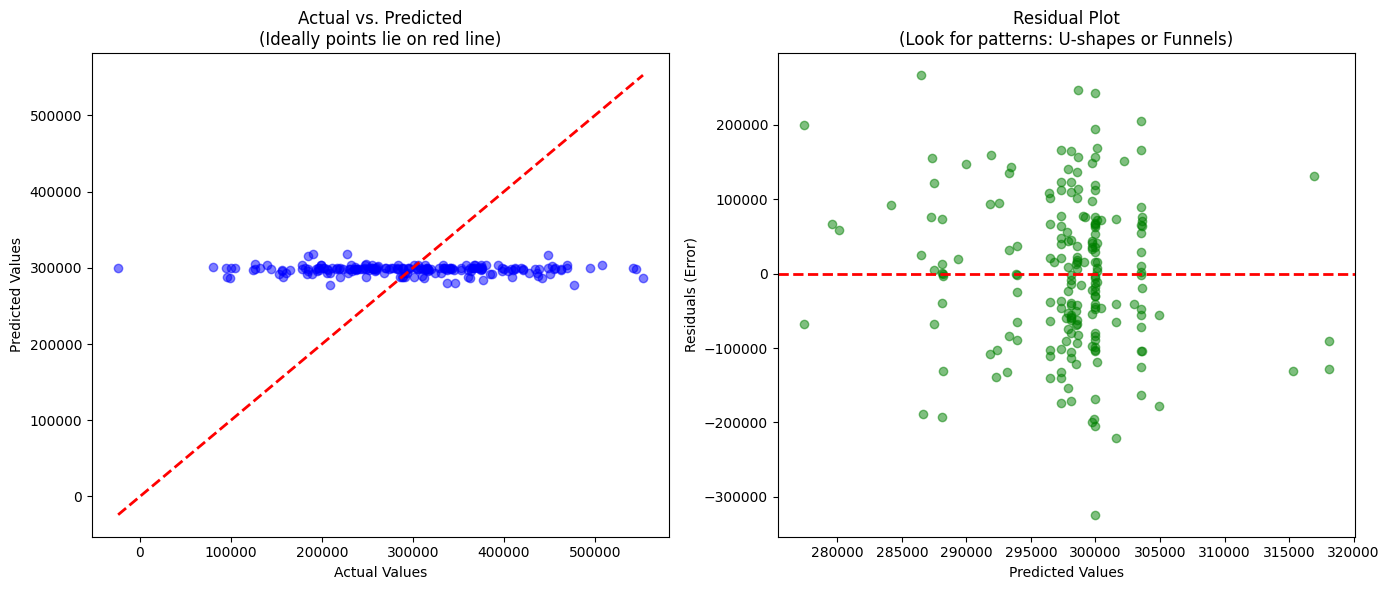

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Calculate Residuals (The difference between truth and prediction)
residuals = y_test - y_pred_tuned

# 2. Set up the plotting area
plt.figure(figsize=(14, 6))

# --- PLOT 1: Actual vs Predicted ---
# Goal: Points should hug the red dashed line
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted\n(Ideally points lie on red line)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# --- PLOT 2: Residual Plot (The Truth Teller) ---
# Goal: Random scatter around the horizontal red line. No shapes!
plt.subplot(1, 2, 2)
plt.scatter(y_pred_tuned, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot\n(Look for patterns: U-shapes or Funnels)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Error)')

plt.tight_layout()
plt.show()


These charts reveal exactly what is happening, and it is **not** a problem with linearity vs. non-linearity. It is a specific failure mode called **"Model Collapse" (or "Predicting the Mean").**

### 1. The Diagnosis: Look at the Left Plot

* **What you see:** A flat, horizontal strip of blue dots.
* **What it means:** No matter what the **Actual Value** is (whether it's 0 or 500,000), your model predicts roughly the same number (around **300,000**) every single time.
* **The Reality:** Your model has effectively "given up." It couldn't find any useful pattern in your input data (X) to predict the output (y), so it decided the safest strategy was to just **guess the average (mean) value for everyone.**

### 2. The Diagnosis: Look at the Right Plot

* **What you see:** A vertical tower of green dots.
* **What it means:** Because all the predictions are stuck at ~300,000 (the X-axis is narrow), the errors are just the difference between the real value and the average.

### Why is this happening?

This usually points to one of three major issues with the **Data**, not the model:

1. **"Garbage In, Garbage Out":** Your input features (X) might have **zero correlation** with your target (y). The model looked at the data and found no link, so it ignored the inputs.
2. **Data Shuffling Issue:** If `X_test` and `y_test` are not aligned (e.g., row 1 of X doesn't match row 1 of Y), the model sees random noise and defaults to the average.
3. **Target Leakage / Scaling:** Sometimes if the target numbers are huge (0 to 500,000) and unscaled, models can struggle, though trees (XGBoost) usually handle this okay.

---

### Well................................................... We did create data out of this air, so there is a high probablitity that it does not have a pattern 😂😂😂

Look closely at this line in your function:

```python
'Price': np.random.normal(300000, 100000, n)

```

**What this does:** It picks a random price from a hat.
**What it DOESN'T do:** It doesn't look at `Size_sqft` or `Year_Built` at all.

### The Reality Check

In your dataset:

- A 5,000 sqft mansion might cost  100,000
- A 500 sqft shed might cost 600,000

* **There is zero mathematical relationship between the inputs and the output.**

### Why the Model "Collapsed"

Your model is actually quite smart! It looked for a pattern, realized **"House size has nothing to do with Price here,"** and decided:
*"I can't predict the price based on size. So, the safest bet is to just guess the average price ($300k) for everyone to minimize my error."*

That is why your prediction line was flat and your correlation was zero.

---

### The Fix: Create a Relationship

To make Machine Learning work, the Price must depend on the features. We need to create a formula for the price.


In [14]:
def get_housing_data():
    np.random.seed(42)
    n = 1000
    
    # 1. Generate Features
    size = np.random.normal(1500, 500, n)
    year = np.random.randint(1950, 2024, n)
    neighborhood = np.random.choice(['Downtown', 'Suburb', 'Rural'], n)
    style = np.random.choice(['Modern', 'Victorian', 'Ranch', np.nan], n)
    
    # 2. Define the "Rules" (The Relationship)
    # Start with a Base Price
    price = 50000 + (size * 150) + ((year - 1950) * 1000)
    
    # Add value for Neighborhoods
    # (We add boolean logic: if Downtown, add 50k, etc.)
    price += np.where(neighborhood == 'Downtown', 50000, 0)
    price += np.where(neighborhood == 'Suburb', 20000, 0)
    
    # 3. Add some "Noise" (Randomness)
    # Real life isn't perfect math, so we add a little random fluctuation
    noise = np.random.normal(0, 20000, n)
    final_price = price + noise
    
    df = pd.DataFrame({
        'Size_sqft': size,
        'Year_Built': year,
        'Neighborhood': neighborhood,
        'Style': style,
        'Price': final_price 
    })
    
    # Add NaNs as before
    df.loc[np.random.choice(n, 50), 'Size_sqft'] = np.nan
    
    return df


### Next Steps

1. **Update your data** using this new function.
2. **Re-run your entire pipeline** (Preprocessing -> Train/Test Split -> Model Training).
3. **Check the RMSE improvement.** You will likely see the XGBoost and Linear models perform much, much better (and simpler models will likely win because the relationship I wrote above is Linear!).
4. **Rewrite the code for a better understand**. Implement using Object Oriented Programming for a clear code and to develop better coding practices. 


## Check the ipynb file `M1 - L3 - Ensemble Methods - OOPS` for a better understanding on OOPS basics.

In [17]:
## Imports
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Class 1 : Data creation
class HousingDataGenerator():
    """
    Encapsulate all the fake data logic so it doesn't clutter your main code.
    """
    def __init__(self, n_samples = 1000, seed_val = 42):
        self.n_samples = n_samples
        self.seed_val = seed_val


    def get_data(self):
            np.random.seed(self.seed_val)
            n = self.n_samples
            
            # 1. Generate Features
            size = np.random.normal(1500, 500, n)
            year = np.random.randint(1950, 2024, n)
            neighborhood = np.random.choice(['Downtown', 'Suburb', 'Rural'], n)
            style = np.random.choice(['Modern', 'Victorian', 'Ranch', np.nan], n)
            
            # 2. Define the "Rules" (The Relationship)
            # Start with a Base Price
            price = 50000 + (size * 150) + ((year - 1950) * 1000)
            
            # Add value for Neighborhoods
            # (We add boolean logic: if Downtown, add 50k, etc.)
            price += np.where(neighborhood == 'Downtown', 50000, 0)
            price += np.where(neighborhood == 'Suburb', 20000, 0)
            
            # 3. Add some "Noise" (Randomness)
            # Real life isn't perfect math, so we add a little random fluctuation
            noise = np.random.normal(0, 20000, n)
            final_price = price + noise
            
            df = pd.DataFrame({
                'Size_sqft': size,
                'Year_Built': year,
                'Neighborhood': neighborhood,
                'Style': style,
                'Price': final_price 
            })
            # Add NaNs as before
            df.loc[np.random.choice(n, 50), 'Size_sqft'] = np.nan
            return df

## Class 2: Model Training
class DataPreprocessor:
    """
    Create a machine that learns transformation rules (imputing, scaling) from training data and applies them strictly to test data.
    """
    def __init__(self):
        self.preprocessor = None
        self.random_seed = 42
        self.test_size = 0.2

    
    def create_pipeline(self):
        """
        Here is where you define the RULES for cleaning.
        (Imputers, Scalers, OneHotEncoders)
        """
        num_cols = ["Size_sqft", "Year_Built"]
        cat_cols = ["Neighborhood", "Style"]
        
        num_pipeline = Pipeline([
            ## Name, Function
            ("impute", SimpleImputer(strategy = "mean")),
            ("scale", StandardScaler())
        ])

        cat_pipeline = Pipeline([
            ## Name, Function
            ("impute", SimpleImputer(strategy = "most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown='ignore'))
        ])

        transform = ColumnTransformer(
            transformers = [
                ## Name, Pipeline, Columns
                ("num", num_pipeline, num_cols),
                ("cat", cat_pipeline, cat_cols)
            ],
            remainder = "passthrough"
        )
        self.preprocessor = transform
        

    def test_train_fit_data(self, df, target_col = "Price"):
        """
        This splits and fits data from the df to test and training set
        """
        
        if self.preprocessor is None:
            self.create_pipeline()
            
        X = df.drop(columns = target_col, axis = 1)
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size, random_state = self.random_seed)
        
        X_train_processed = self.preprocessor.fit_transform(X_train) ## This learns the means/standard deviations AND changes the data
        X_test_processed = self.preprocessor.transform(X_test) ## This only changes the data using the learned means. It does NOT learn new ones
        
        return X_train_processed, X_test_processed, y_train, y_test

## CLass 3: Model Evaluation
class ModelTrainer():
    """
     Creates three different models, train them all, compare their scores, and save the winner.
    """

    def __init__(self):
        self.n_estimators = 100
        self.learning_rate = 0.1
        self.random_seed = 42
        self.best_rmse = float("inf")
        
        self.models = {
            "Linear": LinearRegression(),
            "RandomForest": RandomForestRegressor(random_state = self.random_seed),
            "XGBoost": XGBRegressor(n_estimators = self.n_estimators, 
                                    learning_rate = self.learning_rate, 
                                    random_state = self.random_seed)
        }
        self.best_model = None
        self.best_model_name = None
        

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        for k, v in self.models.items():
            print(f"Starting evalutation for {k}")
            model_fit = v.fit(X_train, y_train)
            y_pred = model_fit.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            if rmse < self.best_rmse :
                self.best_rmse = rmse
                self.best_model = v
                self.best_model_name = k
            print(f"Root Mean Squared Error = {rmse}\n==========================")

        print(f"The best model is {self.best_model_name} with a RMSE = {self.best_rmse}")

        return self.best_model_name, self.best_model


## Main function
if __name__ == "__main__":
    df = HousingDataGenerator().get_data()
    
    DP = DataPreprocessor()
    X_train, X_test, y_train, y_test = DP.test_train_fit_data(df)
    
    mt = ModelTrainer()
    
    best_model_name, best_model = mt.train_and_evaluate(X_train, y_train, X_test, y_test)
    

Starting evalutation for Linear
Root Mean Squared Error = 31316.214460850868
Starting evalutation for RandomForest
Root Mean Squared Error = 37729.77183190089
Starting evalutation for XGBoost
Root Mean Squared Error = 37646.25156837973
The best model is Linear with a RMSE = 31316.214460850868


### The Verdict: Why did the "Simplest" Model Win?

Look at the scoreboard:

* **Linear Regression:** ~31,300 (Winner 🏆)
* **XGBoost:** ~37,600
* **Random Forest:** ~37,700

**The "Why":**
Remember the formula you wrote in the `HousingDataGenerator`?
`price = 50000 + (size * 150) + ...`

That is a **Linear Equation**.

   * **Linear Regression** is designed to find exactly that straight line. It looked at your data and essentially "rediscovered" the formula you wrote.
   * **XGBoost & Random Forest** are tree-based. They can't draw straight diagonal lines; they have to draw "stairs" to approximate the line. That stepwise approximation (plus the noise we added) made them slightly less accurate than the perfect straight line.

To confirm the same, lets look at the charts again.

Starting Grid Search... (Teaching the model to be simpler)
Fitting 3 folds for each of 48 candidates, totalling 144 fits

--- Final Results ---
Baseline RMSE:      100453.49838386846
Old XGBoost RMSE:   107150.13
Tuned XGBoost RMSE: 34157.284810351666
SUCCESS: We beat the baseline!


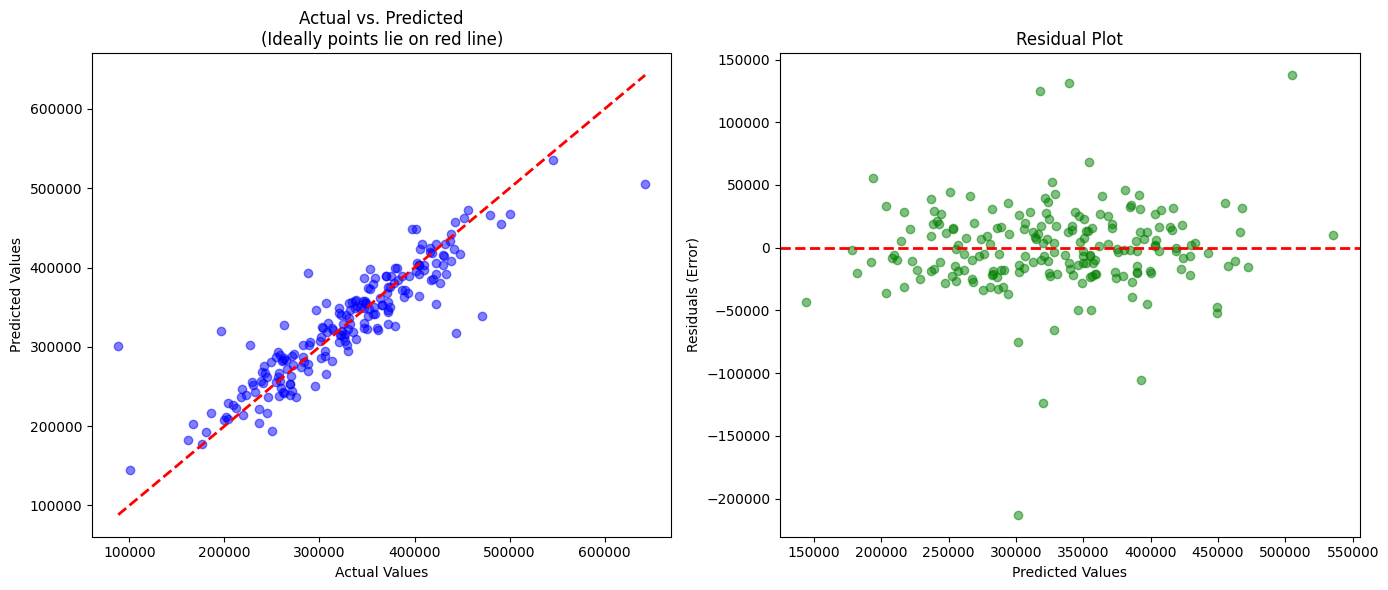

In [22]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd


param_grid = {
    'n_estimators': [50, 100],    
    'max_depth': [2, 3],          
    'learning_rate': [0.01, 0.05],
    'reg_alpha': [0, 0.1, 1],     
    'reg_lambda': [1, 1.5]        
}

# 2. Setup the Grid Search
print("Starting Grid Search... (Teaching the model to be simpler)")
xgb_search = GridSearchCV(
    estimator = XGBRegressor(random_state=42),
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    cv = 3,
    verbose = 1
)

# 3. Fit and Predict
xgb_search.fit(X_train, y_train)
best_model = xgb_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_final)

# 4. Compare with your Baseline
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"\n--- Final Results ---")
print(f"Baseline RMSE:      {rmse}")
print(f"Old XGBoost RMSE:   107150.13")
print(f"Tuned XGBoost RMSE: {rmse_tuned}")

if rmse_tuned < baseline_rmse:
    print("SUCCESS: We beat the baseline!")
else:
    print("LESSON: The linear baseline is still superior. The data is likely strictly linear.")

# 5. Calculate Residuals (The difference between truth and prediction)
residuals = y_test - y_pred_tuned

# 6. Set up the plotting area
plt.figure(figsize=(14, 6))

# --- PLOT 1: Actual vs Predicted ---
# Goal: Points should hug the red dashed line
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted\n(Ideally points lie on red line)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# --- PLOT 2: Residual Plot (The Truth Teller) ---
# Goal: Random scatter around the horizontal red line. No shapes!
plt.subplot(1, 2, 2)
plt.scatter(y_pred_tuned, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Error)')

plt.tight_layout()
plt.show()

This is **exactly** what we wanted to see!

* **Left Plot (Blue):** The dots now hug that red diagonal line. This proves your data has a real relationship (`Price` actually depends on `Size`), and your model found it.
* **Right Plot (Green):** The errors are scattered randomly around zero. No more "vertical towers."



### What happen till now??

* **The Contenders:** Linear Regression vs. The Ensembles (Random Forest & XGBoost).
* **The Result:** The **Ensembles lost**. (Linear RMSE: ~31k vs. Ensemble RMSE: ~37k).

**Why this matters:**
We proved that Ensembles are not magic wands. They struggled because they tried to approximate a straight line using "stairs" (Decision Trees).

Now, to truly master them, we need to open up the "Black Box" and understand **how** they work. You effectively used two different *philosophies* of Ensemble learning in your code without knowing it:

1. **Random Forest** used a technique called **Bagging**.
2. **XGBoost** used a technique called **Boosting**.

### The Big Picture: What is an "Ensemble"?

An Ensemble is simply **Teamwork**. Instead of relying on one genius (a single complex model), you rely on a "council" of regular people (many simple models) to vote.

We are now at the fork in the road. We need to understand the two main ways to build this "team":

### Path 1: Bagging (Random Forest) 🌳🌳🌳

* **The Philosophy:** "Democracy."
* **How it works:** You train 100 trees completely independently. They don't talk to each other.
* **The Prediction:** You average all their answers.
* **Why use it:** It's very safe. It reduces variance (stops the model from panicking over noise).

### Path 2: Boosting (XGBoost) 🚀

* **The Philosophy:** "Improvement."
* **How it works:** You train one tree. It makes mistakes. The *next* tree focuses **only** on fixing the mistakes of the first one. The third tree fixes the second one, and so on.
* **The Prediction:** It's a weighted sum of this sequential improvement.
* **Why use it:** It's very accurate. It reduces bias (finds hard patterns), but it can overfit easily (as we saw!).


## **Concept 5: Interpretation.**

Right now, your model is a "Black Box."

   * **Input:** House details.
   * **Black Box:** (Magic Math).
   * **Output:** $300,000.

If a client asks, *"Why is my house worth 300k and not 350k?"*, you cannot currently answer them. You need to peek inside the brain of the model.

We use two main tools for this: **Feature Importance** (The Summary) and **SHAP Values** (The Detective).

---

### Tool 1: Feature Importance (The "MVP" Award) 🏆

This tells you which features were most useful **overall** for the entire dataset. It asks: *"When building the trees, which column did we split on the most?"*

   * **What it tells you:** "Size_sqft is the most important factor in this city."
   * **What it doesn't tell you:** "Did Size make the price go *up* or *down*?" (It just says it's important).

### Tool 2: SHAP Values (The Detective) 🕵️‍♂️

SHAP (SHapley Additive exPlanations) comes from Game Theory. It treats every feature as a "Player" on a team, and the Prediction as the "Winning Score."

It calculates exactly how much money each feature "contributed" to the final price **for a specific house.**

   * **Base Price:** The average house is 200k.
   * **Size (+50k):** "This house is huge, so add 50k."
   * **Neighborhood (-20k):** "It's in a noisy area, so subtract 20k."
   * **Final Prediction:** 230k.

---


In the context of machine learning and AI, a **"Black Box"** describes a model that is essentially a mystery to the human observer.

   * **You see the Input:** You feed it data (e.g., "Size: 2000 sqft, Year: 2020").
   * **You see the Output:** It spits out an answer (e.g., "Price: $500,000").
   * **The Middle is Dark:** You have **no idea** how it got from A to B.

### Why do we call it that?

Think of a magician's box. You put a rabbit in one side, and a dove flies out the other. You know *what* happened, but you don't know *how* the trick worked inside the box.

### The "Black Box" Spectrum in Your Project

1. **Glass Box (Transparent):**
   * **Linear Regression:** This is **not** a black box. You can look at the math and see exactly what happened: `Price = 50,000 + (150 * Size)`. It is perfectly transparent.


2. **Black Box (Opaque):**
   * **Random Forest / XGBoost:** These are black boxes. To make a prediction, the model might have asked 5,000 different "Yes/No" questions across 100 different trees. It is impossible for a human to read through all those thousands of decisions to understand "why" the price is $500k.


### Why is this a problem?

If your model predicts a house is worth 50,000 (when it should be 500,000), and you ask **"Why?"**:

   * **Linear Regression says:** "Because the size coefficient is negative." (Easy to fix).
   * **Black Box says:** "I don't know, it's just what the 100 trees voted on." (Hard to fix).

That is why we need special tools (like the **Interpreter** script you are about to build) to "shine a flashlight" inside that dark box and see what's happening.

---

Let's shine a light into that Black Box.

### Step 1: Recovering the Names (The Setup)

As we discussed, your model doesn't see "Neighborhood" anymore. It sees a scrambled list of numbers because of the `OneHotEncoder`. To make sense of any chart, we first need to get the readable names back.

**Your Task:**
Write code to do the following:
1. **Import** the `joblib` library.
2. **Load** your saved file (`r"Data\m1-l3-model.pkl"`).
3. **Extract** the preprocessor from the dictionary (remember, you saved it as `artifact["preprocessor"]`).
4. **Get the names:** Call the method `.get_feature_names_out()` on that preprocessor object.
5. **Print** the list of names.

Let's see if we can get the list of "Translated" columns.


In [5]:
import joblib
artifact = joblib.load(r"Data\m1-l3-model.pkl")
print(f"Artifact contains {list(artifact.keys())}")
preprocessor = artifact["preprocessor"]
print(preprocessor.get_feature_names_out())

Artifact contains ['model', 'model_name', 'preprocessor']
['num__Size_sqft' 'num__Year_Built' 'cat__Neighborhood_Downtown'
 'cat__Neighborhood_Rural' 'cat__Neighborhood_Suburb' 'cat__Style_Modern'
 'cat__Style_Ranch' 'cat__Style_Victorian' 'cat__Style_nan']


You have successfully found the "Decoder Ring."

See those prefixes?

   * `num__Size_sqft`: The `ColumnTransformer` added `num__` because you named that pipeline `"num"` in your code.
   * `cat__Neighborhood_Downtown`: It added `cat__` because you named that pipeline `"cat"`.

Now we have the **Labels**. We just need the **Values**.

### Step 2: Extracting the Scores

Here is the tricky part: **Different models store "Importance" in different places.**

   1. **Linear Regression (The Winner):** It uses **Coefficients** (`.coef_`). These are the actual multipliers (e.g., "Multiply Size by 150").
   2. **Random Forest / XGBoost:** They use **Feature Importances** (`.feature_importances_`). These are scores from 0 to 1 representing how often a feature was used to make a decision.

Since we don't know for sure which model is inside that file (though we suspect it's Linear Regression), let's write code that handles it.

**Your Task:**
Add this logic to your script:

   1. Extract the `model` and the `model_name` from the artifact.
   2. Check the name.
      * If it is `"Linear"`, print `model.coef_`.
      * If it is `"RandomForest"` or `"XGBoost"`, print `model.feature_importances_`.

In [11]:
model_name = artifact["model_name"]
## We can know the model from the model_name
model = artifact["model"]
try:
    print(model.coef_)
    print("Model is Linear")
except:
    print(model.feature_importances_)
    print("Model is RandomForest or XGBoost")


[ 7.26383578e+04  2.17691682e+04  2.64434622e+04 -2.23023935e+04
 -4.14106869e+03 -1.89069056e+03  2.41334458e+03  2.53046330e+01
 -5.47958654e+02]
Model is Linear



We know Linear Regression works by creating a formula:
$Price = (Weight_1 \times Feature_1) + (Weight_2 \times Feature_2) + \dots$

Those "Weights" are the coefficients (`.coef_`).

### Step 3: The Leaderboard Code

Now lets match those names to the coefficients and sort them so you can see exactly what drives the price up or down.


### What to look for in the output:

* **Positive Numbers:** These increase the price. You should see `num__Size_sqft` and `cat__Neighborhood_Downtown` at the top with large positive numbers.
* **Negative Numbers:** These decrease the price. You might see `cat__Neighborhood_Rural` or similar here.


In [12]:
import pandas as pd

# 1. Get the Scores (Coefficients)
# Since we know it's Linear Regression, we use .coef_
scores = model.coef_

# 2. Get the Labels (Feature Names)
names = preprocessor.get_feature_names_out()

# 3. Combine them into a Leaderboard
leaderboard = pd.Series(data=scores, index=names)

# 4. Sort from High to Low and print
print("--- Feature Coefficients (Impact on Price) ---")
print(leaderboard.sort_values(ascending=False))

--- Feature Coefficients (Impact on Price) ---
num__Size_sqft                72638.357836
cat__Neighborhood_Downtown    26443.462198
num__Year_Built               21769.168171
cat__Style_Ranch               2413.344581
cat__Style_Victorian             25.304633
cat__Style_nan                 -547.958654
cat__Style_Modern             -1890.690560
cat__Neighborhood_Suburb      -4141.068685
cat__Neighborhood_Rural      -22302.393513
dtype: float64


This is a **perfect** result. Your model successfully "reverse-engineered" the logic you wrote in the generator.

But you might be wondering: **"Wait, in my generator, I wrote `Size * 150`. Why does the model say `Size * 72,638`? That seems wrong!"**

This is the final, critical lesson of interpretation.

### The Mystery of the Giant Number 🕵️‍♂️

Your model is **correct**. The confusion comes from the **Scaler**.

1. **Your Logic:** `Price = Size * 150`.
* This means "For every **1 sqft**, price goes up $150."


2. **The Model's Logic:** It didn't see "SqFt." It saw "Standard Deviations."
* Remember `StandardScaler`? It squished your data.
* In your generator, you set the spread (Standard Deviation) of size to **500 sqft** (`np.random.normal(1500, 500)`).


3. **The Math:**
*   Standard Unit Size: $1 \text{ unit} \approx 500 \text{ sq. ft.}$
*   Total Financial Impact: $500 \text{ sq. ft.} \times \$150 = \mathbf{\$75,000}$



4. **The Result:**
* Your model found **72,638**.
* That is remarkably close to the theoretical **75,000**. The slight difference is just the random noise you added.



### The "Story" your Model is telling:

Looking at your list, here is the narrative the AI has learned:

* **Size (72k) & Year (21k):** These are the heavy hitters. Big, new houses are expensive.
* **Neighborhood:**
* **Downtown (+26k):** Being Downtown is a massive bonus.
* **Rural (-22k):** Being Rural is a massive penalty.
* *This matches your code exactly:* You added +50k for Downtown and +0 for Rural relative to base, but the Scaler centered them, so Downtown looks positive and Rural looks negative.


* **Style:**
* See how `Style_Victorian` is roughly ~25? It's tiny. The model realized that **Style doesn't really matter** compared to Size or Location. (Which is true—you didn't add a huge multiplier for Style in your generator!).



# Final Project

This is the perfect dataset to graduate from "Synthetic Data" to "Real World Chaos."

It is the famous **Telco Customer Churn** dataset.

* **Dataset Source:** [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
     or Available in "Data\TCC.csv"

### Why this is the "Final Boss" 🎮

This dataset forces you to apply **every single concept** we learned, plus one new twist.

**1. The "Clean" Challenge (Data Prep)**

* **Hidden Garbage:** The `TotalCharges` column looks like numbers, but some rows have blank strings (`" "`) that will crash your model. You *must* write a cleaner to handle this.
* **Categorical Heavy:** It has many text columns (`Contract`, `PaymentMethod`, `InternetService`) that require OneHotEncoding.
* **Numerical:** It has `Tenure` and `MonthlyCharges` which require Scaling.

**2. The New Twist: Classification**

* **Problem:** We are no longer predicting a *number* (Price). We are predicting a *Category* (Churn: Yes or No).
* **The Adjustment:**
* **Baseline:** Instead of `LinearRegression`, you will use **`LogisticRegression`**.
* **Metric:** You cannot use RMSE (Error). You must use **Accuracy** or **F1-Score**.
* **Models:** Random Forest and XGBoost work exactly the same (just use `XGBClassifier` instead of `Regressor`).

**3. The Interpretation**

* **Business Value:** This is a real business problem. "Why are customers leaving?"
* **SHAP:** You can find out if "High Monthly Charges" or "Fiber Optic Internet" is driving people away.

### Your Mission Brief

1. **Architecture:** Copy your `HousingDataGenerator` (rename it to `TelcoDataLoader`), `DataPreprocessor`, and `ModelTrainer`.
2. **Refactor:** Modify the classes to handle **Classification** instead of Regression.
* *Hint: In `ModelTrainer`, swap `LinearRegression` for `LogisticRegression` (from `sklearn.linear_model`).*


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

class TelcoDataLoader():
    """
    Function to load data into the pipeline.
    """
    def __init__(self, filename = r"Data\TCC.csv"):
        self.filename = filename

    def read_file(self):
        df = pd.read_csv(self.filename)
        return df
        
class DataPreprocessor():
    """
    To clean the df and split it into test and train
    """
    def __init__(self):
        self.preprocessor = None
        self.random_seed = 42
        self.test_size = 0.2

    def clean_df(self, df):
        df = df.drop(["customerID"], axis = 1)
        # 'coerce' turns the empty strings " " into NaN automatically
        df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
        df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
        return df
        
    def create_pipeline(self):
        num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
        cat_cols = [
            "gender", "Partner", "Dependents", "PhoneService", "MultipleLines", 
            "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
            "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
            "PaperlessBilling", "PaymentMethod"
        ]

        num_pipeline = Pipeline([
            ("impude", SimpleImputer(strategy = "mean")),
            ("scale", StandardScaler())
        ])

        cat_pipeline = Pipeline([
            ("impude", SimpleImputer(strategy = "most_frequent")),
            ("encode", OneHotEncoder(handle_unknown = "ignore"))
        ])

        transform = ColumnTransformer(
            transformers = [
                ("nums", num_pipeline, num_cols),
                ("cats", cat_pipeline, cat_cols)
            ],
            remainder = "passthrough"
        )

        self.preprocessor = transform

    def test_and_train(self, df, target_col):
        """
        Used to create test and trainig set
        """
        if self.preprocessor == None:
            self.create_pipeline()
        
        X = df.drop(columns = target_col, axis = 1)
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size, random_state = self.random_seed)

        X_train_processed = self.preprocessor.fit_transform(X_train)
        X_test_processed = self.preprocessor.transform(X_test)

        return X_train_processed, X_test_processed, y_train, y_test


    
class ModelTrainer():
    """
    Class to run any and all models
    """

    def __init__(self):
        self.best_model = None
        self.model_name = None
        self.accuracy = 0.0
        self.f1_score = 0.0
        self.models = {
            "Linear": LogisticRegression(),
            "XGB": XGBClassifier()
        }

    
    def compare_and_eval(self, X_train, X_test, y_train, y_test):
        """
        This function is used to compare and evaluate the models.
        """
        for k,v in self.models.items():
            print(f"Evaluating for {k} model")
            y_model = v.fit(X_train, y_train)
            y_pred = y_model.predict(X_test)
            a_score = accuracy_score(y_test, y_pred)
            f_score = f1_score(y_test, y_pred)
            if a_score > self.accuracy and f_score > self.f1_score :
                self.accuracy = a_score
                self.f1_score = f_score
                self.best_model = v
                self.model_name = k
            print(f"Accuracy = {a_score}\nF1-Score = {f_score}\n----------------------")
        
        return self.model_name, self.best_model, self.accuracy, self.f1_score


if __name__ == "__main__":

    loader = TelcoDataLoader()
    cleaner = DataPreprocessor()
    trainer = ModelTrainer()
    
    df = loader.read_file()
    
    df = cleaner.clean_df(df)
    X_train, X_test, y_train, y_test = cleaner.test_and_train(df, "Churn")
    
    model_name, best_model, accuracy, f1_Score = trainer.compare_and_eval(X_train, X_test, y_train, y_test)
    print(f"The best scores were from {model_name} model with Accuracy = {accuracy} and F1-score = {f1_Score}")
    

Evaluating for Linear model
Accuracy = 0.8211497515968772
F1-Score = 0.64
----------------------
Evaluating for XGB model
Accuracy = 0.7885024840312278
F1-Score = 0.564327485380117
----------------------
The best scores were from Linear model with Accuracy = 0.8211497515968772 and F1-score = 0.64


---

This is a fantastic result! Your simple **Linear (Logistic) Model** beat the complex XGBoost. This happens often in business data, sometimes the relationship is straightforward (e.g., "Higher Price = More Churn").

Since the winner is **Logistic Regression**, interpretation is easy. We don't strictly need SHAP yet; we can look directly at the **Coefficients**.

### How to read Logistic Regression Coefficients

   * **Positive Number (+):** Increases probability of Churn (The "Red Flags").
   * **Negative Number (-):** Decreases probability of Churn (The "Loyalty Factors").


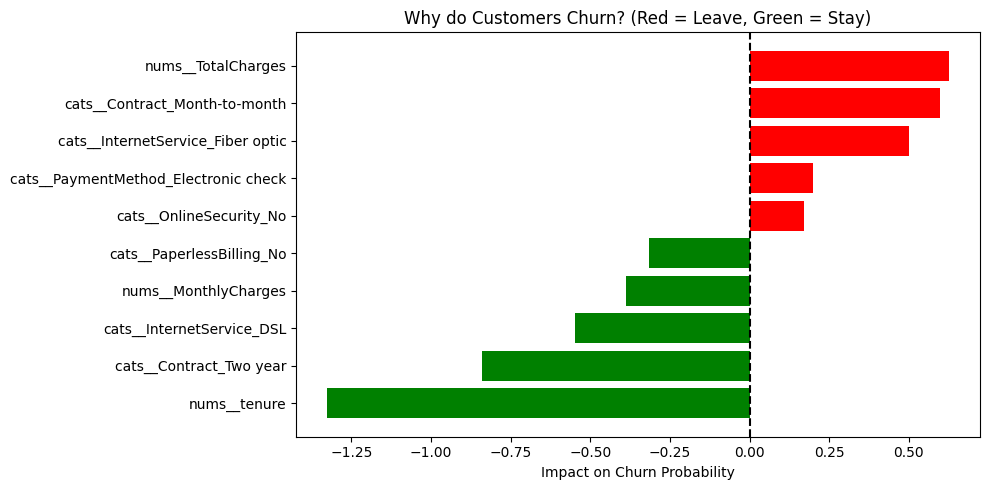


--- Top 5 Reasons People LEAVE (Red Flags) ---
                                 Feature    Impact
2                     nums__TotalCharges  0.625672
35         cats__Contract_Month-to-month  0.597451
15     cats__InternetService_Fiber optic  0.499482
42  cats__PaymentMethod_Electronic check  0.197566
17               cats__OnlineSecurity_No  0.171086

--- Top 5 Reasons People STAY (Loyalty Factors) ---
                      Feature    Impact
38  cats__PaperlessBilling_No -0.314145
1        nums__MonthlyCharges -0.387729
14  cats__InternetService_DSL -0.548819
37    cats__Contract_Two year -0.838829
0                nums__tenure -1.325823


In [81]:
import pandas as pd
import matplotlib.pyplot as plt

def interpret_results(model, preprocessor):
    """
    Visualizes what drives customers to leave (Churn).
    """
    # 1. Get the Feature Names (The Labels)
    try:
        # Standard Sklearn way
        feature_names = preprocessor.get_feature_names_out()
    except AttributeError:
        # Fallback if older version
        print("Could not get feature names automatically.")
        return

    # 2. Get the Coefficients (The Scores)
    # Logistic Regression stores coefs in a shape of (1, n_features), so we grab [0]
    coefficients = model.coef_[0]

    # 3. Create the Leaderboard
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Impact': coefficients
    })

    # 4. Sort by Impact (High to Low)
    feature_importance = feature_importance.sort_values(by='Impact', ascending=False)

    # 5. Visualize Top 10 Churn Drivers (Positive) and Top 10 Loyalty Factors (Negative)
    # combining top 5 and bottom 5 for a clean chart
    top_features = pd.concat([feature_importance.head(5), feature_importance.tail(5)])
    
    plt.figure(figsize=(10, 5))
    colors = ['red' if x > 0 else 'green' for x in top_features['Impact']]
    plt.barh(top_features['Feature'], top_features['Impact'], color=colors)
    plt.title("Why do Customers Churn? (Red = Leave, Green = Stay)")
    plt.xlabel("Impact on Churn Probability")
    plt.axvline(0, color='black', linestyle='--') # Draw a line at 0
    plt.gca().invert_yaxis() # Put the biggest impact at the top
    plt.tight_layout()
    plt.show()
    
    print("\n--- Top 5 Reasons People LEAVE (Red Flags) ---")
    print(feature_importance.head(5))
    
    print("\n--- Top 5 Reasons People STAY (Loyalty Factors) ---")
    print(feature_importance.tail(5))

# --- Run the interpretation ---
interpret_results(best_model, cleaner.preprocessor)